In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

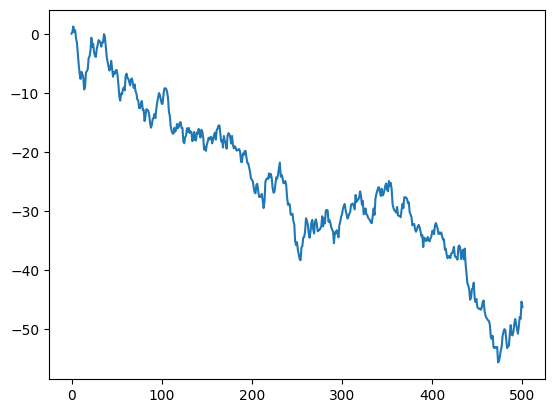

In [16]:
points = [0.0]
for i in range(500):
    points.append(points[i] + np.random.normal(0.0, 1.0))
    
ser = pd.Series(points)
sns.lineplot(ser)